In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

# Objective

Given a set of attributes for an Individual, **determine if a credit line should be extended to them**. If so, what should the **repayment terms be in business recommendations?**

**Column Description:**

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [8]:
df = pd.read_csv('logistic_regression.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df.shape

(396030, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [15]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [16]:
df['loan_status'].value_counts(normalize = True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

**We need to Oversample the train data set**

# Univariate Analysis

In [17]:
num_vars = ['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
cat_vars = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','title','earliest_cr_line','open_acc','pub_rec','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies','address']

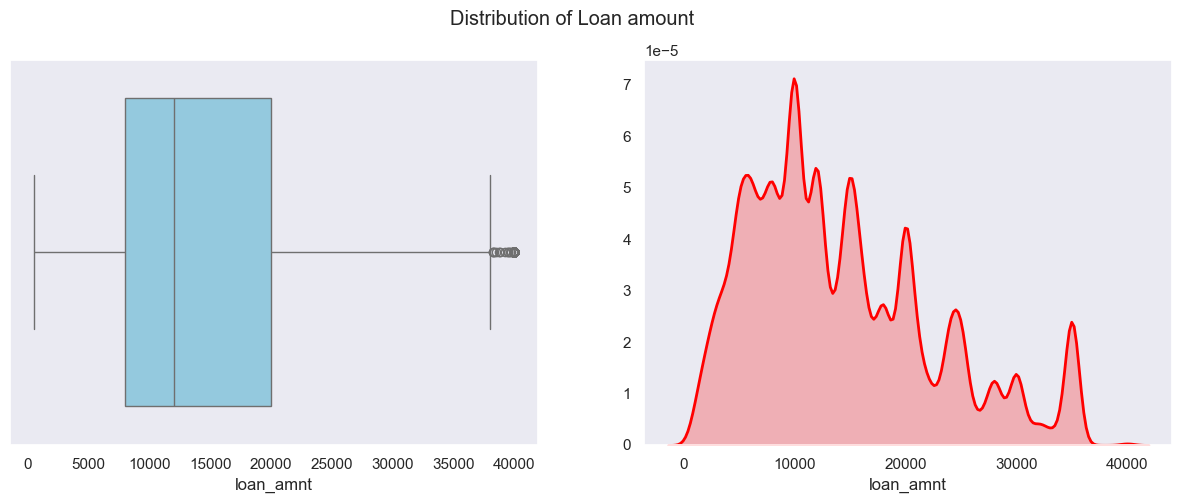

In [18]:
plt.figure(figsize = (15,5))
sns.set(style = 'dark')
plt.subplot(1,2,1)
sns.boxplot(x = 'loan_amnt',data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Loan amount")

plt.subplot(1,2,2)
sns.kdeplot(x = 'loan_amnt',data = df, color='red', fill=True,linewidth = 2)
plt.ylabel("")

plt.show()

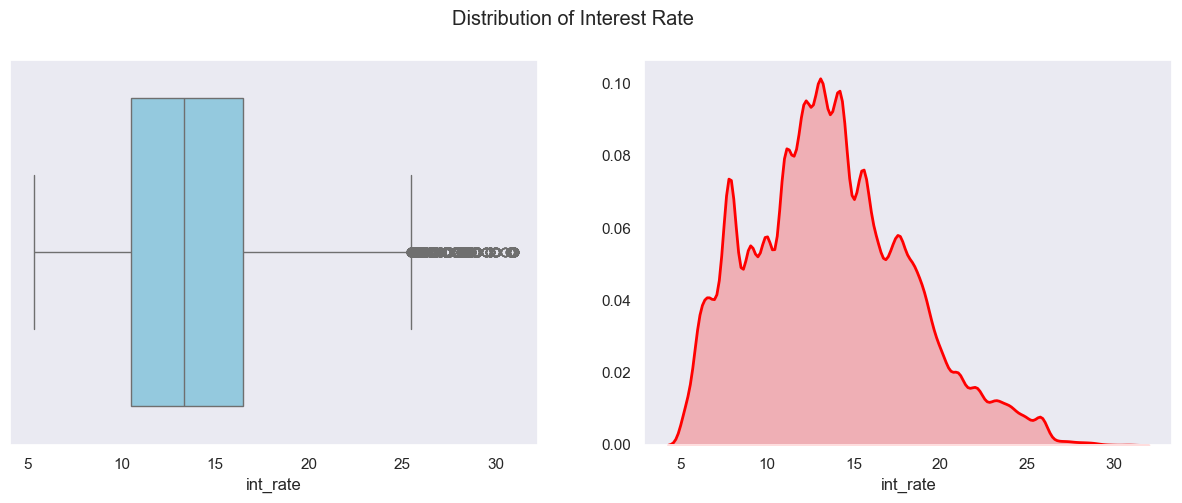

In [19]:
plt.figure(figsize = (15,5))
col = 'int_rate'
plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Interest Rate")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

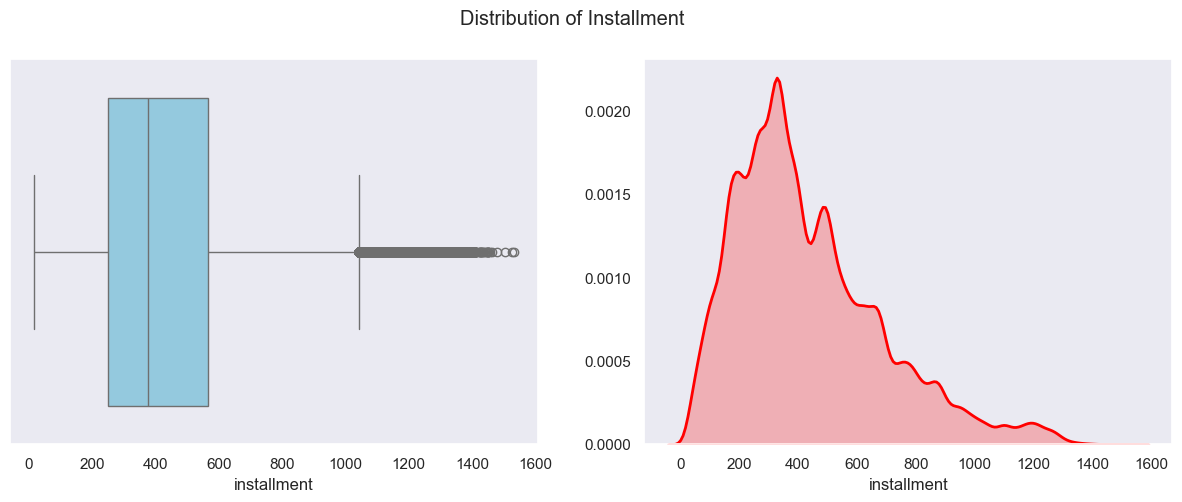

In [20]:
col = 'installment'

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Installment")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

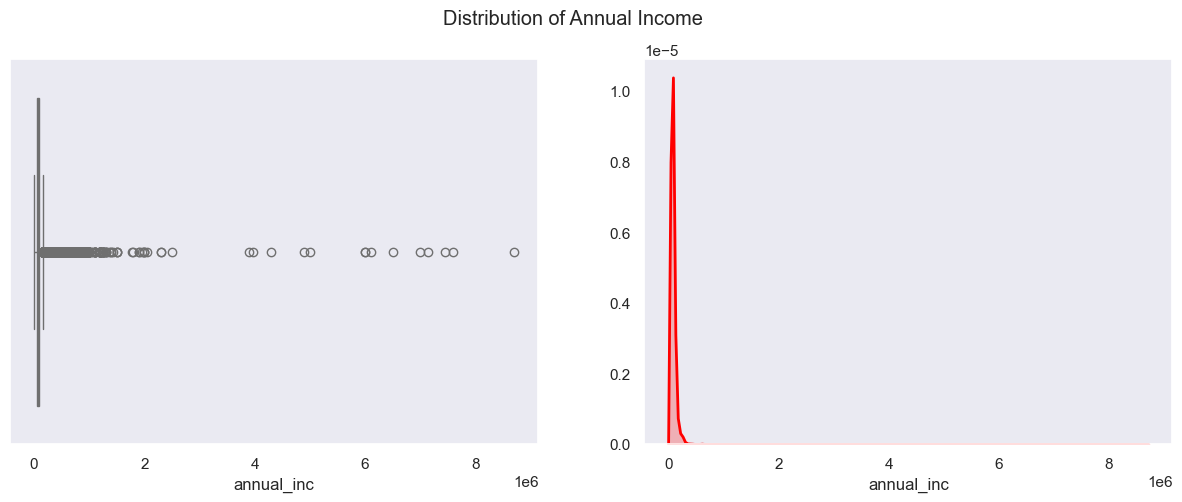

In [21]:
col = 'annual_inc'

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Annual Income")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

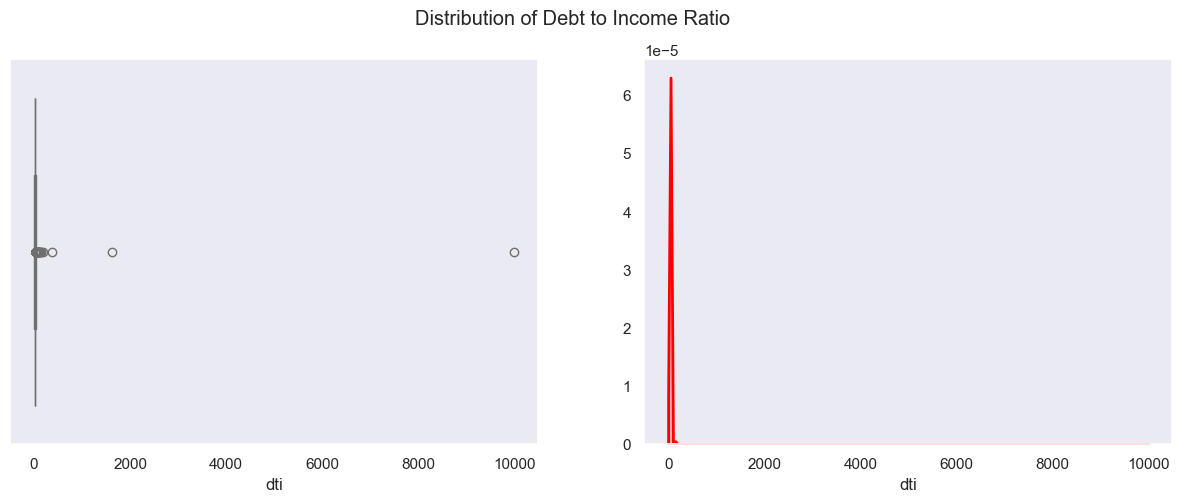

In [22]:
col = 'dti'

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Debt to Income Ratio")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

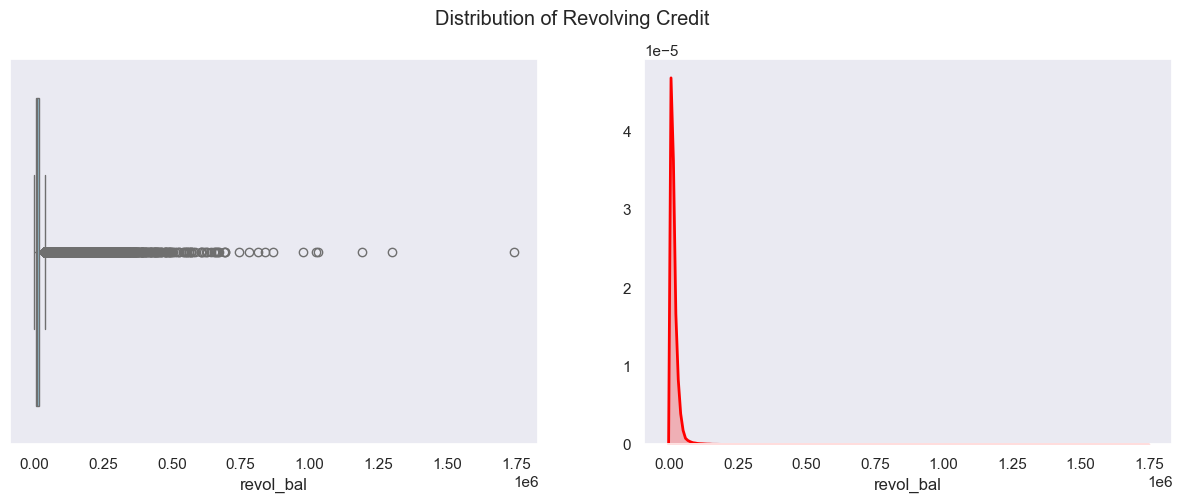

In [23]:
col = 'revol_bal'

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Revolving Credit")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

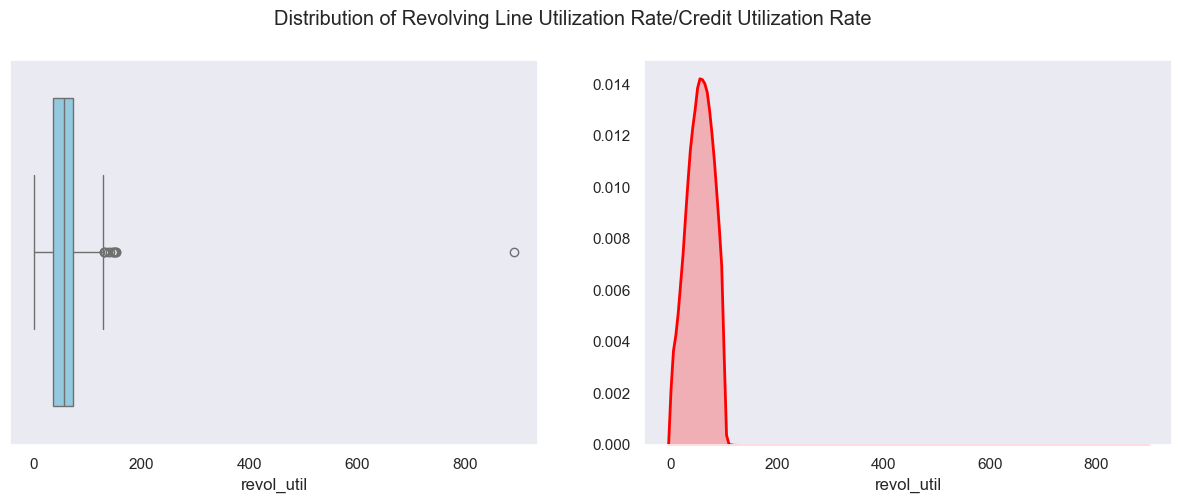

In [24]:
col = 'revol_util'

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = col,data = df,color = 'skyblue')
plt.ylabel("")
plt.suptitle("Distribution of Revolving Line Utilization Rate/Credit Utilization Rate")

plt.subplot(1,2,2)
sns.kdeplot(x = col,data = df,fill=True,linewidth = 2,color = 'red')
plt.ylabel("")

plt.show()

## Observations
1. The predominant range for loan amounts falls between 8000 and 10000, indicating a common loan size preference among applicants.

2. The majority of interest rates cluster around 10% with a narrow deviation of approximately ±3%, suggesting a consistent interest rate pattern.

3. Annual incomes predominantly fall within the range of 45,000 to 90,000, and revolving balances are concentrated in the 6,000 to 20,000 range for most applicants.

4. Debt to Income Ratios predominantly range from 11 to 23, reflecting a common ratio distribution among loan applicants.

5. The majority of applicants exhibit a Revolving Utilization rate in the range of 36-73, indicating a prevalent pattern in how applicants utilize their revolving credit lines.

6. All of these above columns have outliers need to remove them before modelling.

In [25]:
def dist_count_plot(x_var,title,x_tick_rotation = 0,dataframe = df):

  print(bold_text('-'*70))
  print(bold_text(f'Percentage Distribution of {x_var}'),'\n')

  # below two lines of code are done to remove header from value_counts
  term_per = np.round(df[x_var].value_counts(normalize=True)*100,2)
  print(term_per.to_string( header=False))

  print(bold_text('-'*70))
  print(bold_text(f"Percentage Distribution of {x_var} for different loan status:"),"\n\n",\
        np.round(pd.crosstab(index = df['loan_status'],columns =df[x_var],normalize = 'columns')*100,2))
  print(bold_text('-'*70),'\n')

  # plots started from here
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  order = df[x_var].value_counts().index
  sns.countplot(data = df, x = x_var,order = order)
  plt.xlabel(title)
  plt.xticks(rotation = x_tick_rotation)
  plt.ylabel('')


  plt.subplot(1,2,2)
  sns.countplot(data = df, x = x_var,hue = 'loan_status',order = order)
  plt.xlabel(title)
  plt.xticks(rotation = x_tick_rotation)
  plt.ylabel('');


In [26]:
# dict_cat_vars = {i:df[i].nunique() for i in cat_vars}
# dict_cat_vars = (dict(sorted(dict_cat_vars.items(),key = lambda x: x[1])))
# for i,j in dict_cat_vars.items():
#   print(f"Number of unique values for {i} column: {j}")

----------------------------------------------------------------------
Percentage Distribution of term 

 36 months    76.26
 60 months    23.74
----------------------------------------------------------------------
Percentage Distribution of term for different loan status: 

 term          36 months   60 months
loan_status                        
Charged Off       15.77       31.94
Fully Paid        84.23       68.06
---------------------------------------------------------------------- 



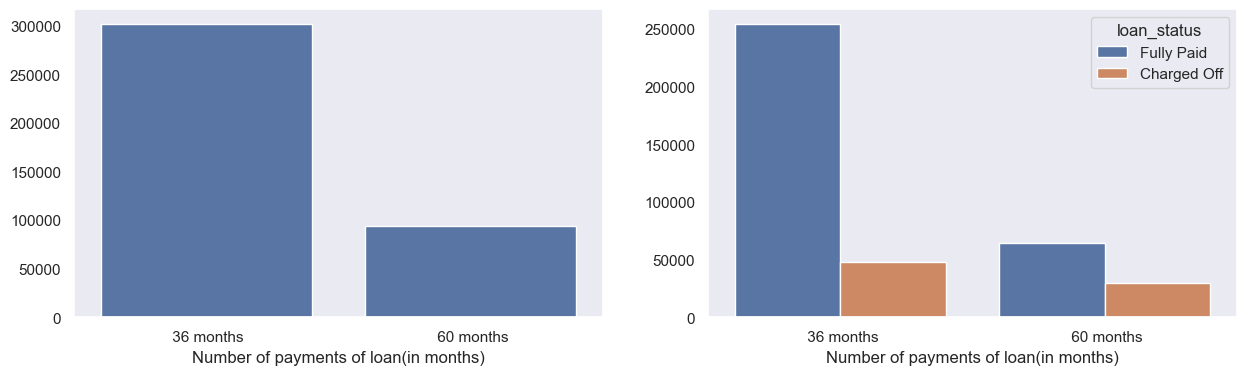

In [27]:
dist_count_plot('term','Number of payments of loan(in months)')

----------------------------------------------------------------------
Percentage Distribution of initial_list_status 

f    60.11
w    39.89
----------------------------------------------------------------------
Percentage Distribution of initial_list_status for different loan status: 

 initial_list_status      f      w
loan_status                      
Charged Off          19.31  20.08
Fully Paid           80.69  79.92
---------------------------------------------------------------------- 



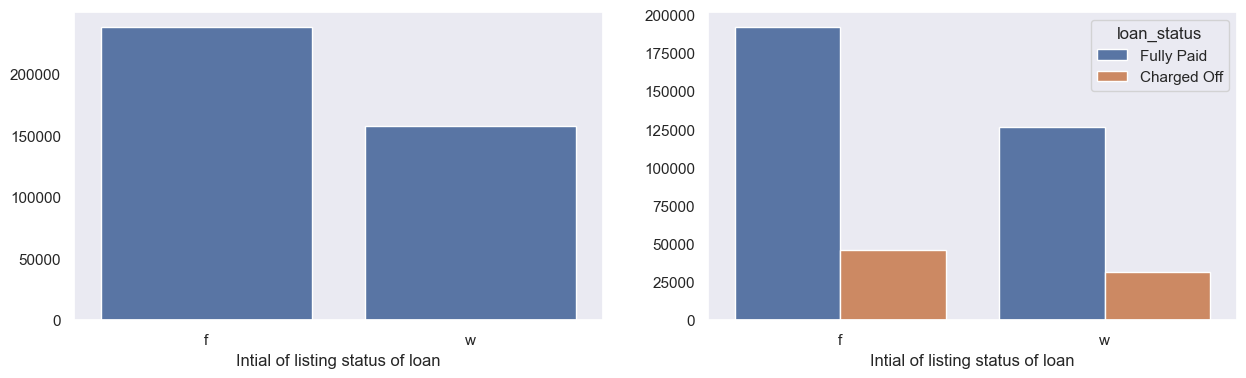

In [28]:
dist_count_plot('initial_list_status','Intial of listing status of loan')

----------------------------------------------------------------------
Percentage Distribution of verification_status 

Verified           35.24
Source Verified    33.18
Not Verified       31.58
----------------------------------------------------------------------
Percentage Distribution of verification_status for different loan status: 

 verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                 14.64            21.47     22.32
Fully Paid                  85.36            78.53     77.68
---------------------------------------------------------------------- 



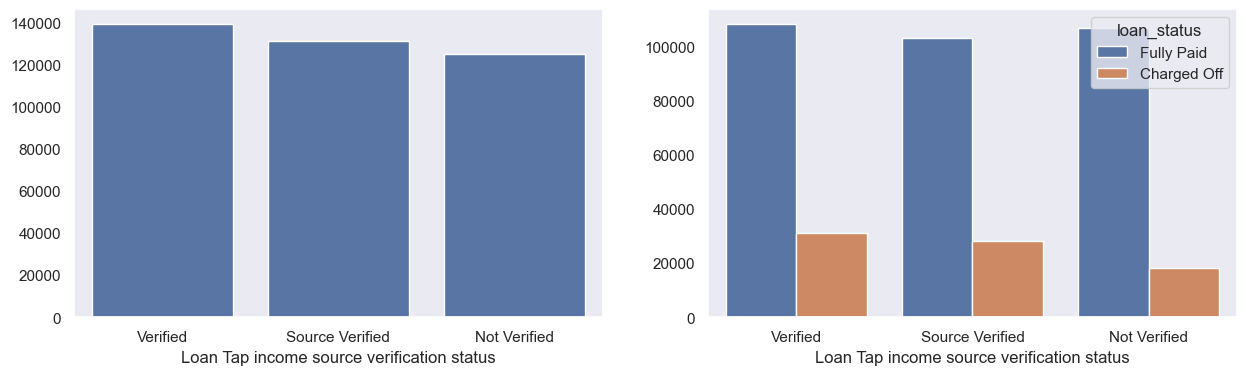

In [29]:
dist_count_plot('verification_status','Loan Tap income source verification status')

----------------------------------------------------------------------
Percentage Distribution of application_type 

INDIVIDUAL    99.82
JOINT          0.11
DIRECT_PAY     0.07
----------------------------------------------------------------------
Percentage Distribution of application_type for different loan status: 

 application_type  DIRECT_PAY  INDIVIDUAL  JOINT
loan_status                                    
Charged Off            35.66       19.61  12.71
Fully Paid             64.34       80.39  87.29
---------------------------------------------------------------------- 



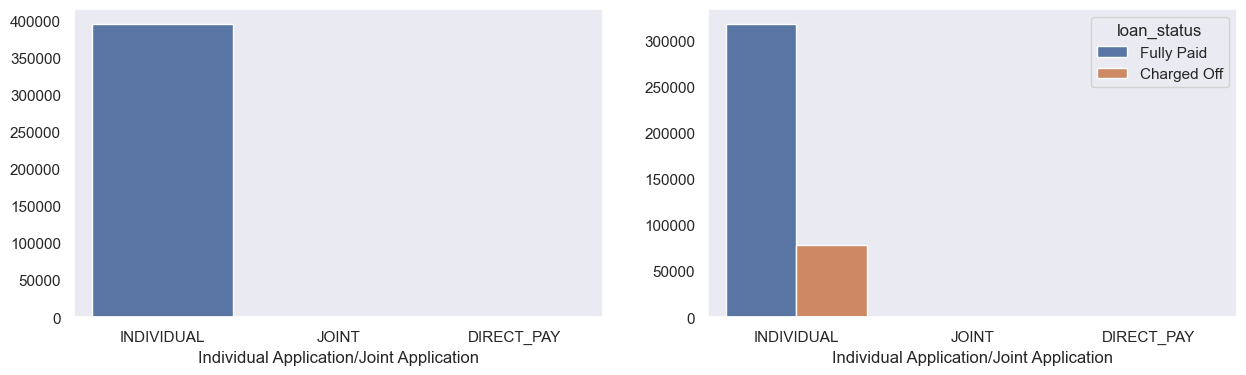

In [30]:
dist_count_plot('application_type','Individual Application/Joint Application')

----------------------------------------------------------------------
Percentage Distribution of home_ownership 

MORTGAGE    50.08
RENT        40.35
OWN          9.53
OTHER        0.03
NONE         0.01
ANY          0.00
----------------------------------------------------------------------
Percentage Distribution of home_ownership for different loan status: 

 home_ownership    ANY  MORTGAGE   NONE  OTHER    OWN   RENT
loan_status                                                
Charged Off       0.0     16.96  22.58  14.29  20.68  22.66
Fully Paid      100.0     83.04  77.42  85.71  79.32  77.34
---------------------------------------------------------------------- 



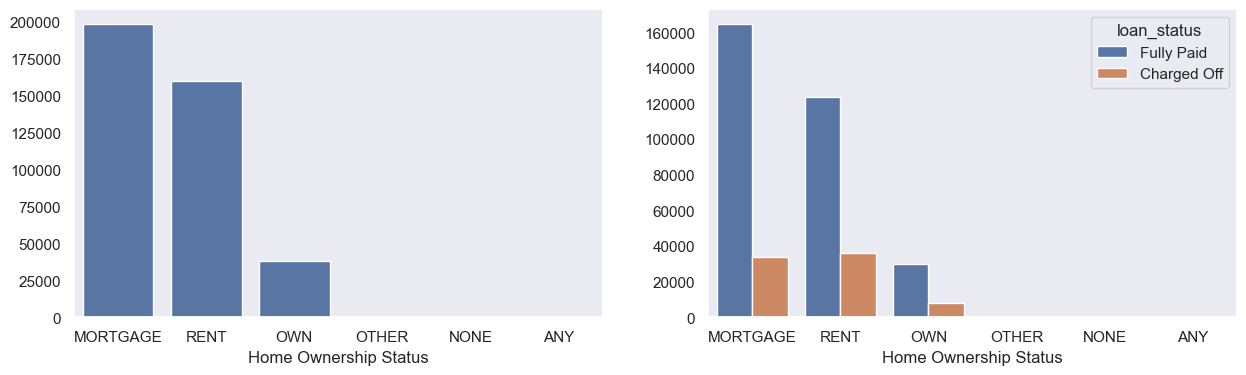

In [31]:
dist_count_plot('home_ownership','Home Ownership Status')

----------------------------------------------------------------------
Percentage Distribution of grade 

B    29.30
C    26.76
A    16.21
D    16.04
E     7.95
F     2.97
G     0.77
----------------------------------------------------------------------
Percentage Distribution of grade for different loan status: 

 grade            A      B      C      D      E      F      G
loan_status                                                 
Charged Off   6.29  12.57  21.18  28.87  37.36  42.79  47.84
Fully Paid   93.71  87.43  78.82  71.13  62.64  57.21  52.16
---------------------------------------------------------------------- 



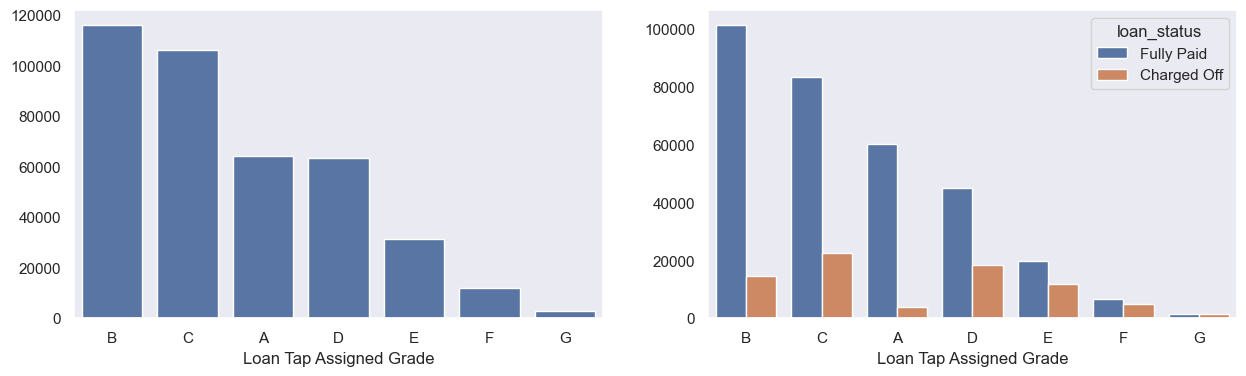

In [32]:
dist_count_plot('grade','Loan Tap Assigned Grade')

----------------------------------------------------------------------
Percentage Distribution of pub_rec_bankruptcies 

0.0    88.59
1.0    10.82
2.0     0.47
3.0     0.09
4.0     0.02
5.0     0.01
6.0     0.00
7.0     0.00
8.0     0.00
----------------------------------------------------------------------
Percentage Distribution of pub_rec_bankruptcies for different loan status: 

 pub_rec_bankruptcies   0.0    1.0    2.0    3.0    4.0    5.0    6.0   7.0  \
loan_status                                                                  
Charged Off           19.5  20.39  23.23  21.08  31.71  15.62  28.57  25.0   
Fully Paid            80.5  79.61  76.77  78.92  68.29  84.38  71.43  75.0   

pub_rec_bankruptcies   8.0  
loan_status                 
Charged Off           50.0  
Fully Paid            50.0  
---------------------------------------------------------------------- 



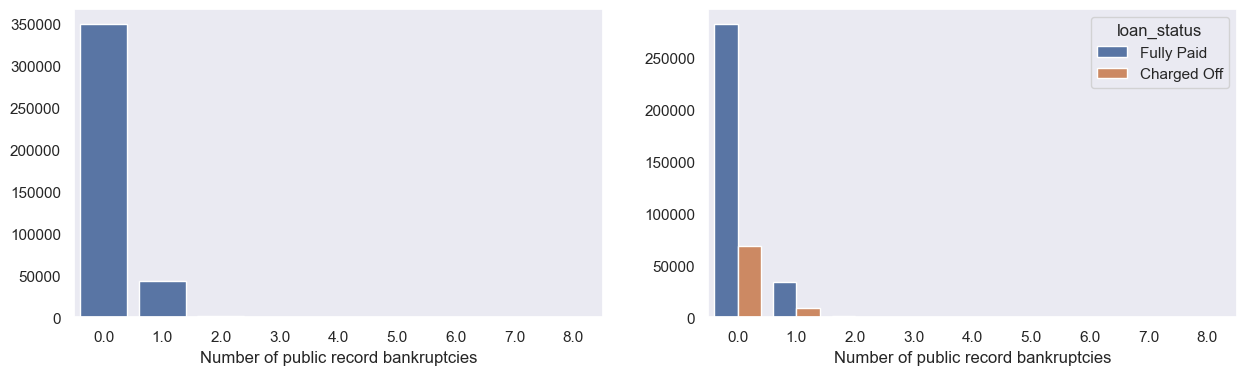

In [33]:
dist_count_plot('pub_rec_bankruptcies','Number of public record bankruptcies')

----------------------------------------------------------------------
Percentage Distribution of emp_length 

10+ years    33.37
2 years       9.48
< 1 year      8.40
3 years       8.38
5 years       7.01
1 year        6.85
4 years       6.34
6 years       5.52
7 years       5.51
8 years       5.07
9 years       4.05
----------------------------------------------------------------------
Percentage Distribution of emp_length for different loan status: 

 emp_length   1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
loan_status                                                                   
Charged Off   19.91      18.42    19.33    19.52    19.24    19.22    18.92   
Fully Paid    80.09      81.58    80.67    80.48    80.76    80.78    81.08   

emp_length   7 years  8 years  9 years  < 1 year  
loan_status                                       
Charged Off    19.48    19.98    20.05     20.69  
Fully Paid     80.52    80.02    79.95     79.31  
--------------------

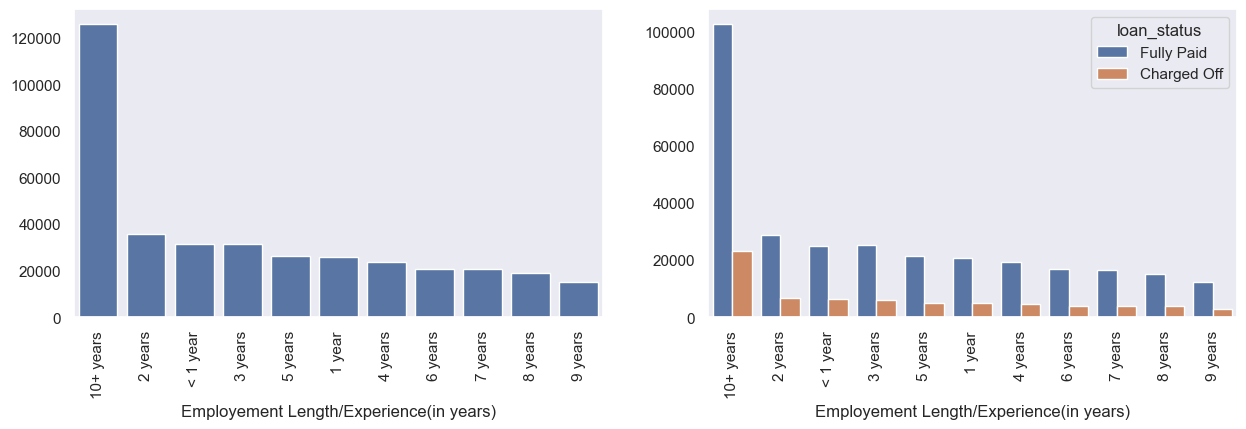

In [34]:
dist_count_plot('emp_length','Employement Length/Experience(in years)',x_tick_rotation = 90)

----------------------------------------------------------------------
Percentage Distribution of purpose 

debt_consolidation    59.21
credit_card           20.96
home_improvement       6.07
other                  5.35
major_purchase         2.22
small_business         1.44
car                    1.19
medical                1.06
moving                 0.72
vacation               0.62
house                  0.56
wedding                0.46
renewable_energy       0.08
educational            0.06
----------------------------------------------------------------------
Percentage Distribution of purpose for different loan status: 

 purpose        car  credit_card  debt_consolidation  educational  \
loan_status                                                        
Charged Off  13.48        16.71               20.74        16.34   
Fully Paid   86.52        83.29               79.26        83.66   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status

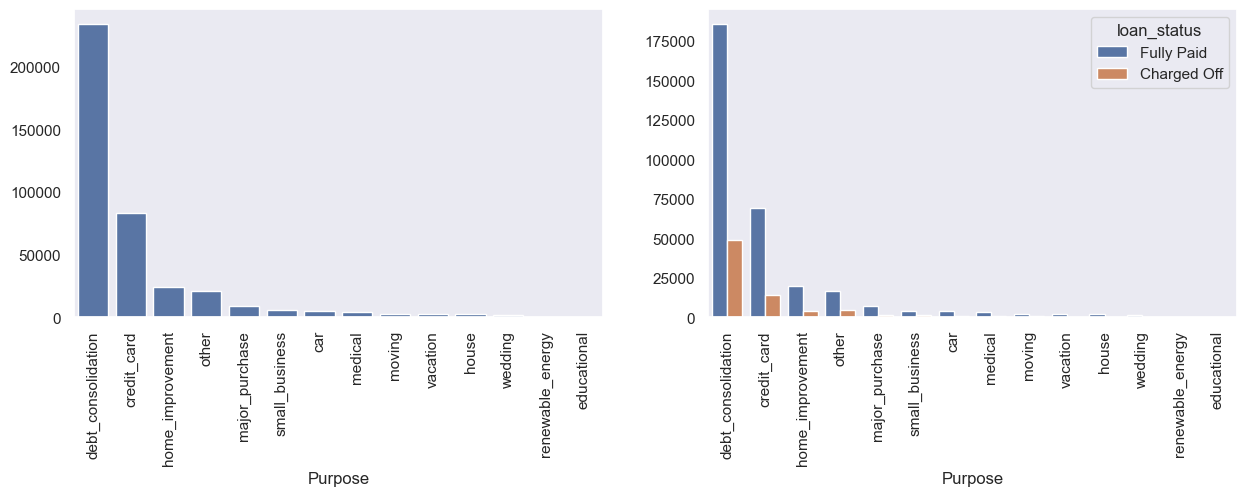

In [35]:
dist_count_plot('purpose','Purpose',x_tick_rotation = 90)

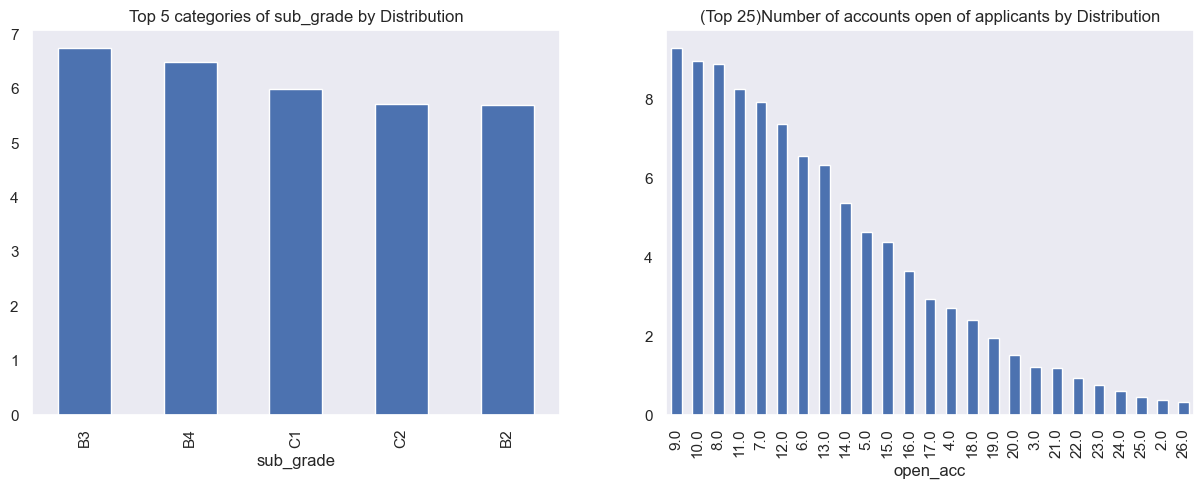

In [36]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
(df['sub_grade'].value_counts(normalize = True)*100)[:5].plot(kind = 'bar');
plt.title('Top 5 categories of sub_grade by Distribution')

plt.subplot(1,2,2)
(df['open_acc'].value_counts(normalize = True)*100).iloc[:25].plot(kind = 'bar')
plt.title('(Top 25)Number of accounts open of applicants by Distribution')

plt.show()

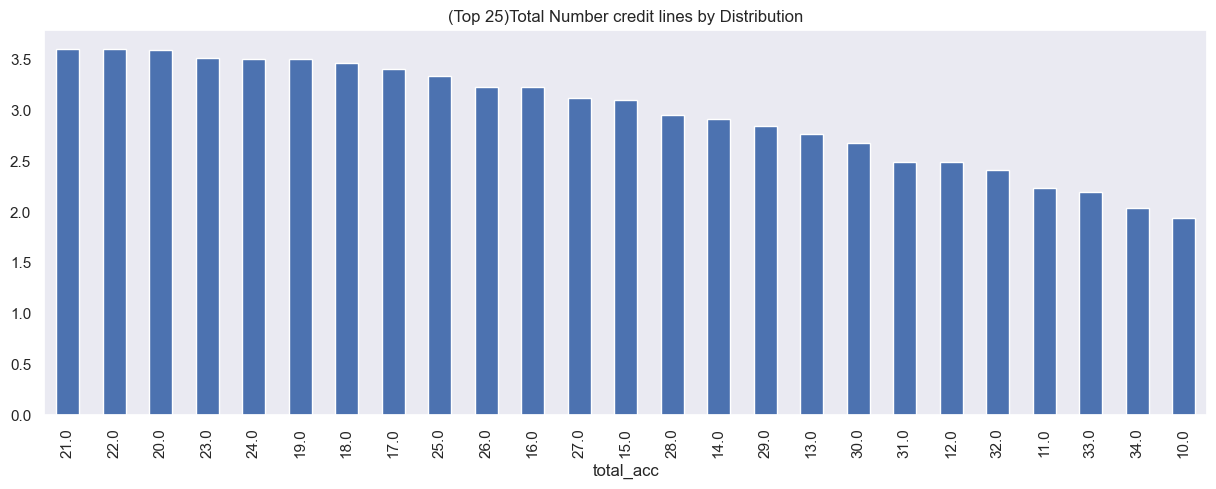

In [37]:
plt.figure(figsize = (15,5))
(df['total_acc'].value_counts(normalize = True)*100).iloc[:25].plot(kind = 'bar')
plt.title('(Top 25)Total Number credit lines by Distribution');

In [38]:
df['total_acc'].value_counts(normalize = True)*100

total_acc
21.0     3.605787
22.0     3.600737
20.0     3.592657
23.0     3.515643
24.0     3.504280
           ...   
110.0    0.000253
129.0    0.000253
135.0    0.000253
104.0    0.000253
103.0    0.000253
Name: proportion, Length: 118, dtype: float64

In [39]:
# df['earliest_cr_line'].apply(lambda x: x.split('-')[1]).value_counts().sort_index(ascending = False)[:20]

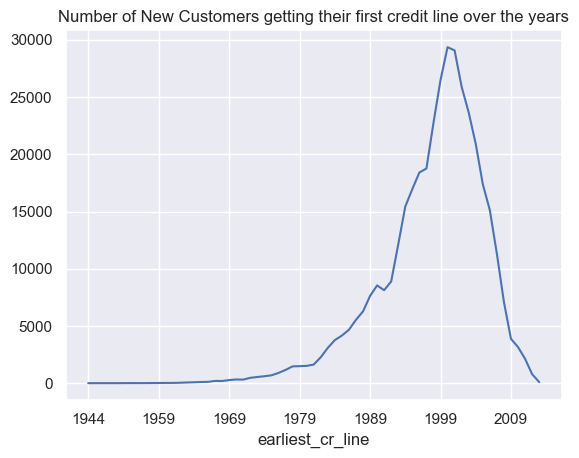

In [40]:
df['earliest_cr_line'].apply(lambda x: x.split('-')[1]).value_counts().sort_index().plot(kind ='line')
plt.title('Number of New Customers getting their first credit line over the years');
plt.grid()

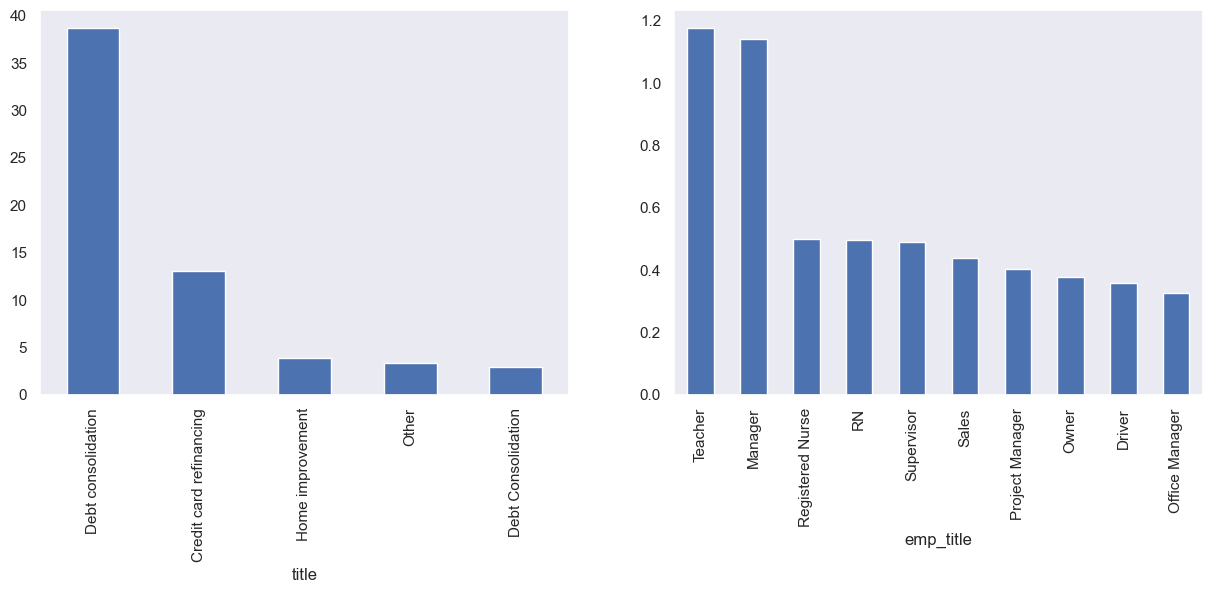

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
(df['title'].value_counts(normalize = True)*100)[:5].plot(kind = 'bar')

plt.subplot(1,2,2)
(df['emp_title'].value_counts(normalize = True,)*100).iloc[:10].plot(kind = 'bar')

plt.show()

In [42]:
 emp_title_list = (df['emp_title'].value_counts(normalize = True,)*100).iloc[:10].index.tolist()
 np.round(pd.crosstab(index = df[df['emp_title'].isin(emp_title_list)]['loan_status'],columns =df['emp_title'],normalize = 'columns')*100,2)

emp_title,Driver,Manager,Office Manager,Owner,Project Manager,RN,Registered Nurse,Sales,Supervisor,Teacher
loan_status,,,,,,,,,,
Charged Off,28.23,21.86,20.36,32.34,16.35,20.53,20.47,24.36,22.13,19.53
Fully Paid,71.77,78.14,79.64,67.66,83.65,79.47,79.53,75.64,77.87,80.47


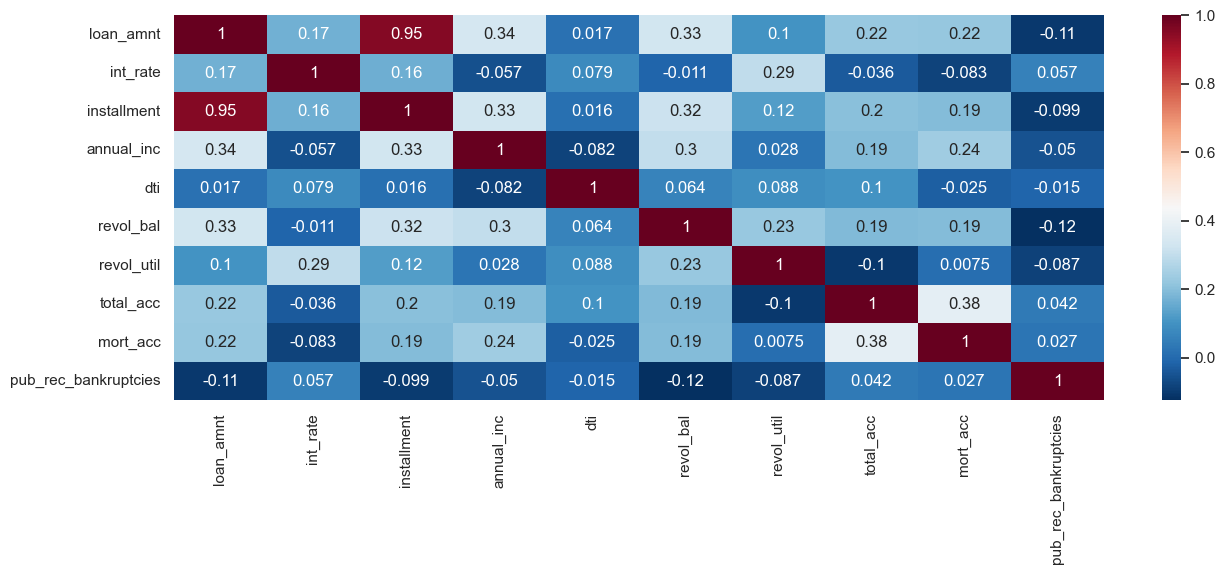

In [44]:
plt.figure(figsize = (15,5))
sns.heatmap(df[num_vars].corr(),annot = True,cmap = 'RdBu_r')
plt.show()

## Observations
1. The majority of applicants prefer a loan term of 36 months, indicating a preference for shorter repayment periods.

2. The initial listing status 'F' is the most common among applicants, suggesting a prevalent trend at the start of the loan application process.

3. Approximately 30% of applicants have unverified income sources, highlighting a significant portion of individuals whose income may not be validated.

4. The majority of loan applications are from individuals rather than joint applications, indicating a predominant preference for individual loans.

5. Homeownership status is commonly categorized as MORTGAGE or RENT among applicants, with fewer applicants owning homes outright.

6. Applicants graded as 'A' are more likely to successfully repay their loans, emphasizing the importance of credit grading in predicting loan outcomes.

7. A notable percentage of applicants have no public records of bankruptcies, indicating a positive financial history for a significant portion of the applicant pool.

8. Applicants with over 10 years of work experience are more likely to apply for loans, suggesting a correlation between employment longevity and loan applications.

9. Debt Consolidation emerges as the primary purpose for obtaining loans, indicating a prevalent trend among applicants.

10. Sub-grades B3, B4, C1, C2, and B2 collectively represent the top five distribution percentages among applicants, emphasizing the significance of sub-grades in loan applications.

11. Applicants typically have 8-10 open credit lines when applying for loans, reflecting a common credit usage pattern among borrowers.

12. The majority of loan applicants have a total of 17-32 credit lines, highlighting a diverse credit history among the applicant pool.

13. A declining trend in new credit line applications is observed post-2003, suggesting a potential shift or external factors influencing the demand for credit.

14. Professions such as teaching and management show the highest frequency of loan applications, indicating popular career choices among loan applicants.

15. A strong positive correlation exists between the monthly installment amount and the loan amount, implying that as the loan amount increases, the monthly installment also tends to rise.



# Data Pre-Processing

In [45]:
!pip install -U imblearn

In [46]:
#  !pip install -U scikit-learn
from sklearn.preprocessing import TargetEncoder,StandardScaler
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['loan_status'],axis = 1)
y = df['loan_status']
cat_vars = ['term','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','issue_d','purpose','earliest_cr_line','open_acc'\
            ,'total_acc','initial_list_status','application_type','address_state']

In [50]:
func_store = [None,None,None]

# feature engg1
def data_preprocessing(X,test_train,y = None,target_enc = func_store[0],sim_imputer = func_store[1],scaler = func_store[2]):

  if test_train == 'train':
    global func_store
    func_store =[None,None,None]
  elif   test_train == 'test':
    if func_store[0] == None:
      print("You have to train first!!!")
      print("Breaking from the program.................")
      exit()
    target_enc,sim_imputer,scaler   = func_store[0],func_store[1],func_store[2]



  def find_address(x):
    if 'USCGC' in x or'USNS' in x or'USNV' in x or'USS' in x or'Unit' in x or'Box' in x:
      return x.split(' ')[-2].strip()
    else :
      return x.split(',')[-1].strip().split(' ')[0]

  X['address_state']  = X['address'].apply(lambda x: find_address(x))

  X['purpose'] = X['purpose'].replace({'home_improvement':'house'})
  X['open_acc'] = pd.cut(X['open_acc'],[-1,10,20,30,40,50,100],\
                        labels = ['[0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 100]'])
  X['total_acc'] = pd.cut(X['total_acc'],[1,10,20,30,40,50,60,70,80,90,100,160],\
                    labels = ['(1, 10]', '(10, 20]','(20, 30]','(30, 40]','(40, 50]',\
                              '(50, 60]','(60, 70]','(70, 80]','(80, 90]','(90, 100]','(100, 160]'])

  print('*'*50)
  print('Done: Feature Engineering1; Extracted States from Address, Performed Binning on these purpose,open_acc,total_acc columns ')
  print('*'*50)



  # dropping duplicated rows
  if X.duplicated().sum():
    X.drop_duplicates(inplace = True)
  print('Done: Dropping Duplicates')
  print('*'*50)


  # dropping uneccesarry columns
  X.drop(['title','emp_title','address'],axis = 1,inplace = True)


  # target encoding the categorical variables
  if test_train == 'train':
    target_enc = TargetEncoder(smooth="auto")
    X[cat_vars] = pd.DataFrame(target_enc.fit_transform(X[cat_vars], y),columns = cat_vars)
  elif test_train == 'test':
    X[cat_vars] = pd.DataFrame(target_enc.transform(X[cat_vars]),columns = cat_vars)

  print('Done: Encoded; Target Encoding the values')
  print('*'*50)


  # imputing the missing values
  if test_train == 'train':
    sim_imputer = SimpleImputer(strategy='mean')
    X_imputed_encoded = pd.DataFrame(sim_imputer.fit_transform(X),columns = X.columns)
  elif test_train == 'test':
    X_imputed_encoded = pd.DataFrame(sim_imputer.transform(X),columns = X.columns)
  print('Done: Handled Missing values; Mean Imputing the Values')
  print('*'*50)


  #feature engineering2
  X_imputed_encoded['pub_rec'] = X_imputed_encoded['pub_rec'].apply(lambda x: 1 if x > 1 else 0)
  X_imputed_encoded['mort_acc'] = X_imputed_encoded['mort_acc'].apply(lambda x: 1 if x > 1 else 0)
  X_imputed_encoded['pub_rec_bankruptcies'] = X_imputed_encoded['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1 else 0)
  print('Done: Feature Engineering2; Feature Engineering on pub_rec, mort_acc, pub_rec_bankruptcies')
  print('*'*50)



  #Scaling
  if test_train == 'train':
    scaler = StandardScaler()
    X_imputed_encoded = pd.DataFrame(scaler.fit_transform(X_imputed_encoded),\
                                    columns = X_imputed_encoded.columns)
  elif test_train == 'test':
    X_imputed_encoded = pd.DataFrame(scaler.transform(X_imputed_encoded),\
                                    columns = X_imputed_encoded.columns)
  print('Done: Scaling; Standard Scaling the values')
  print('*'*50)


  # removing outliers
  not_outliers = (X_imputed_encoded < 3) & (X_imputed_encoded > -3)
  remove_outlier_rows = not_outliers.apply(lambda x: x.all(),axis = 1 )
  X_imputed_encoded = X_imputed_encoded[remove_outlier_rows]
  print('Done: Handled Outliers; Removed Outliers')
  print('*'*50)


  if test_train == 'train':
    func_store[0],func_store[1],func_store[2] = target_enc,sim_imputer,scaler
    print("Returning Modified Dataset(x,y), Outlier indexes, Target Encoder, Simple Imputer(mean), Standard Scaler")
    return X_imputed_encoded,remove_outlier_rows,target_enc,sim_imputer,scaler

  elif test_train == 'test':
    return X_imputed_encoded,remove_outlier_rows

In [51]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [52]:
X_train_processed,outlier_rows,a,b,c = data_preprocessing(X_train,'train',y=y_train)
y_train_processed = y_train.replace({'Fully Paid':1,'Charged Off':0}).reset_index(drop = True)[outlier_rows]

**************************************************
Done: Feature Engineering1; Extracted States from Address, Performed Binning on these purpose,open_acc,total_acc columns 
**************************************************
Done: Dropping Duplicates
**************************************************
Done: Encoded; Target Encoding the values
**************************************************
Done: Handled Missing values; Mean Imputing the Values
**************************************************
Done: Feature Engineering2; Feature Engineering on pub_rec, mort_acc, pub_rec_bankruptcies
**************************************************
Done: Scaling; Standard Scaling the values
**************************************************
Done: Handled Outliers; Removed Outliers
**************************************************
Returning Modified Dataset(x,y), Outlier indexes, Target Encoder, Simple Imputer(mean), Standard Scaler


In [53]:
X_val_processed,outlier_val_index = data_preprocessing(X_val,'test',y=y_val)
y_val_processed = y_val.replace({'Fully Paid':1,'Charged Off':0}).reset_index(drop = True)[outlier_val_index]

**************************************************
Done: Feature Engineering1; Extracted States from Address, Performed Binning on these purpose,open_acc,total_acc columns 
**************************************************
Done: Dropping Duplicates
**************************************************
Done: Encoded; Target Encoding the values
**************************************************
Done: Handled Missing values; Mean Imputing the Values
**************************************************
Done: Feature Engineering2; Feature Engineering on pub_rec, mort_acc, pub_rec_bankruptcies
**************************************************
Done: Scaling; Standard Scaling the values
**************************************************
Done: Handled Outliers; Removed Outliers
**************************************************


In [57]:
X_test_processed,outlier_test_index = data_preprocessing(X_test,'test',y=y_test)
y_test_processed = y_test.replace({'Fully Paid':1,'Charged Off':0}).reset_index(drop = True)[outlier_test_index]

**************************************************
Done: Feature Engineering1; Extracted States from Address, Performed Binning on these purpose,open_acc,total_acc columns 
**************************************************
Done: Dropping Duplicates
**************************************************
Done: Encoded; Target Encoding the values
**************************************************
Done: Handled Missing values; Mean Imputing the Values
**************************************************
Done: Feature Engineering2; Feature Engineering on pub_rec, mort_acc, pub_rec_bankruptcies
**************************************************
Done: Scaling; Standard Scaling the values
**************************************************
Done: Handled Outliers; Removed Outliers
**************************************************


# Model Building

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score,precision_recall_curve,\
                                  confusion_matrix,ConfusionMatrixDisplay,\
                                  roc_curve, roc_auc_score, auc

In [59]:
logreg_baseline = LogisticRegression()

In [60]:
logreg_baseline.fit(X_train_processed,y_train_processed)
y_train_pred_baseline = logreg_baseline.predict(X_train_processed)
y_test_pred_baseline = logreg_baseline.predict(X_test_processed)

print('*'*50)
print("Accuracy Score for Baseline Model(Training):",np.round(logreg_baseline.score(X_train_processed,y_train_processed)*100,2))
print("Recall Score for Baseline Model(Training):",np.round(recall_score(y_train_processed, y_train_pred_baseline)*100,2))
print("Precision Score for Baseline Model(Training):",np.round(precision_score(y_train_processed, y_train_pred_baseline)*100,2))
print("F1 Score for Baseline Model(Training):",np.round(f1_score(y_train_processed, y_train_pred_baseline)*100,2),)

print('\n')
print('*'*50)
print("Accuracy Score for Baseline Model(Testing):",np.round(logreg_baseline.score(X_test_processed,y_test_processed)*100,2))
print("Recall Score for Baseline Model(Testing):",np.round(recall_score(y_test_processed, y_test_pred_baseline)*100,2))
print("Precision Score for Baseline Model(Testing):",np.round(precision_score(y_test_processed, y_test_pred_baseline)*100,2))
print("F1 Score for Baseline Model(Testing):",np.round(f1_score(y_test_processed, y_test_pred_baseline)*100,2))

**************************************************
Accuracy Score for Baseline Model(Training): 80.6
Recall Score for Baseline Model(Training): 98.82
Precision Score for Baseline Model(Training): 81.18
F1 Score for Baseline Model(Training): 89.14


**************************************************
Accuracy Score for Baseline Model(Testing): 80.46
Recall Score for Baseline Model(Testing): 98.8
Precision Score for Baseline Model(Testing): 81.04
F1 Score for Baseline Model(Testing): 89.04


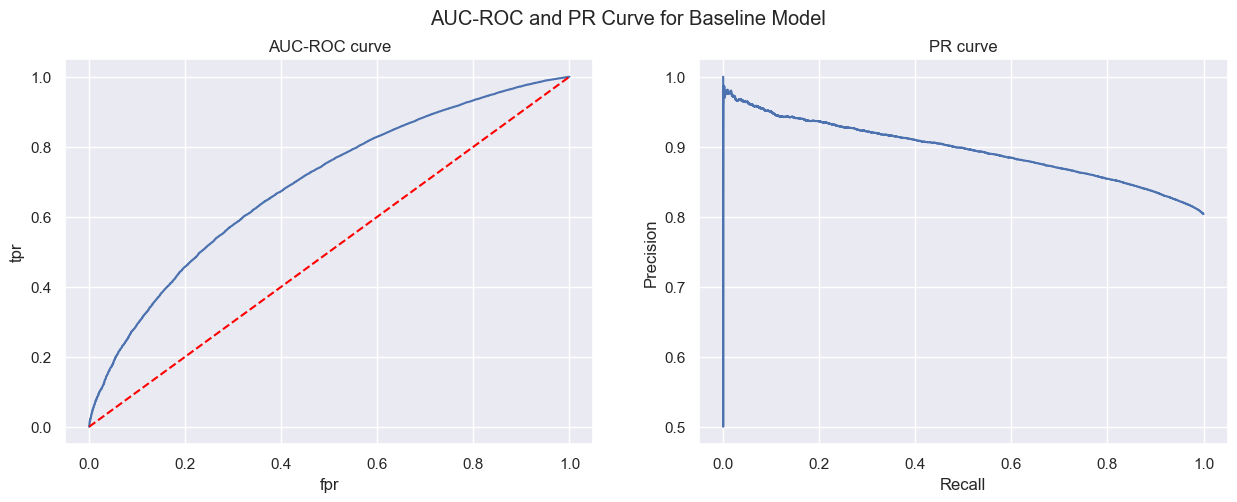

In [61]:
y_prob_baseline = logreg_baseline.predict_proba(X_test_processed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_processed, y_prob_baseline)
precision, recall, thr = precision_recall_curve(y_test_processed, y_prob_baseline)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUC-ROC curve')
plt.grid()


plt.subplot(1,2,2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.grid()

plt.suptitle("AUC-ROC and PR Curve for Baseline Model")


plt.show()

## Observations
1. A balance between Precision and Recall can achieved as observed from the graph, which is around 80% for both recall and precision.


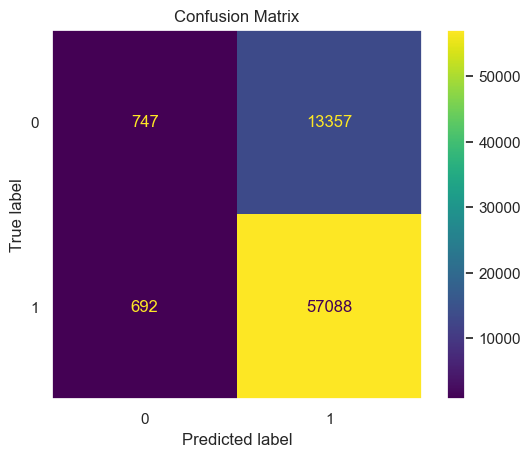

In [62]:
y_pred_baseline = logreg_baseline.predict(X_test_processed)
cm = confusion_matrix(y_test_processed, y_pred_baseline)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
plt.title('Confusion Matrix')

plt.show()

## Hyper Parameter Tuning

In [63]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for lam in [1e-2,1e-1,1,10,100]:
  logreg = LogisticRegression(penalty = 'elasticnet', C = 1/lam,solver = 'saga',l1_ratio = 0.1)
  logreg.fit(X_train_processed,y_train_processed)
  y_pred = logreg.predict(X_val_processed)

  accuracy_scores.append(logreg.score(X_val_processed,y_val_processed))
  recall_scores.append(recall_score(y_val_processed, y_pred))
  precision_scores.append(precision_score(y_val_processed, y_pred))
  f1_scores.append(f1_score(y_val_processed, y_pred))




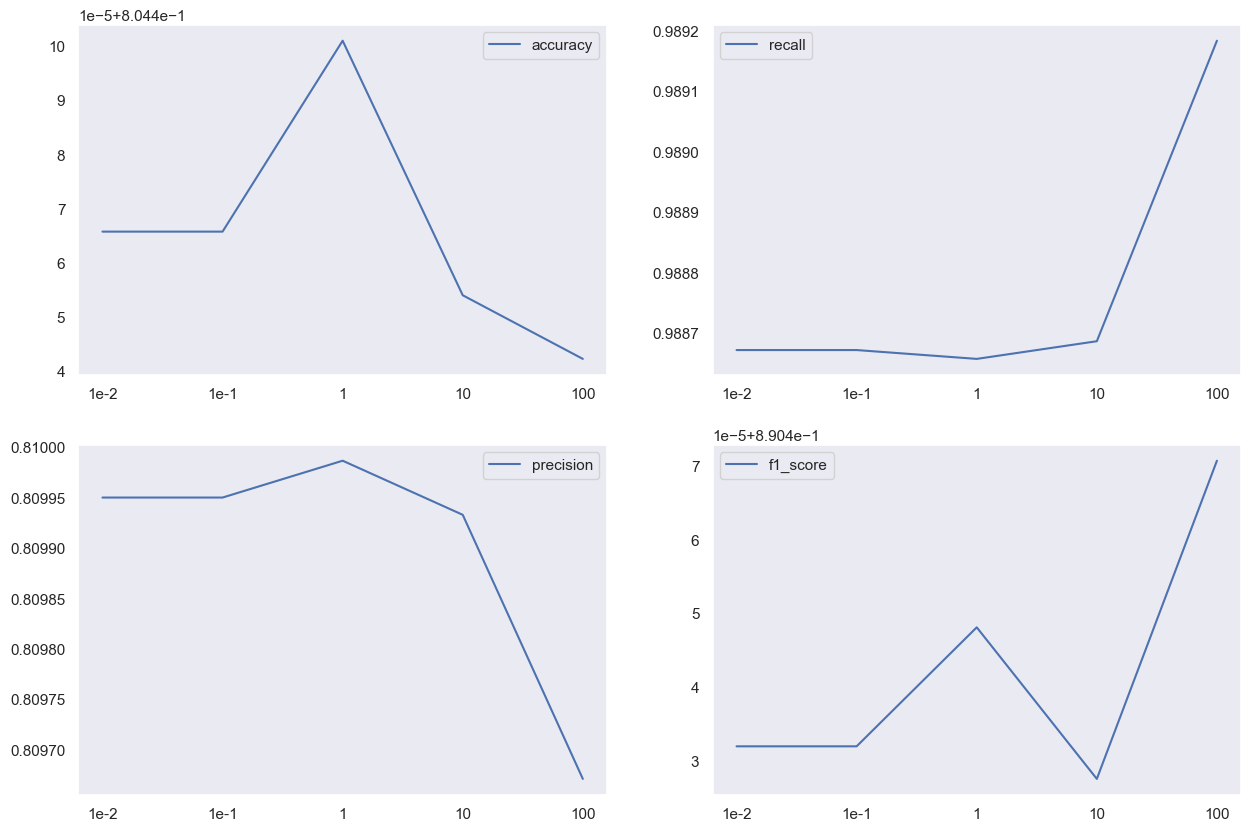

In [66]:
plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
sns.lineplot(x=['1e-2','1e-1','1','10','100'],y = accuracy_scores,label = 'accuracy')
plt.subplot(2,2,2)
sns.lineplot(x=['1e-2','1e-1','1','10','100'],y = recall_scores,label = 'recall')
plt.subplot(2,2,3)
sns.lineplot(x=['1e-2','1e-1','1','10','100'],y = precision_scores,label = 'precision')
plt.subplot(2,2,4)
sns.lineplot(x=['1e-2','1e-1','1','10','100'],y = f1_scores,label = 'f1_score')

plt.legend()
plt.show()


**Here as we have taken Charged Off as 0 and Fully Paid as 1 and Recall is the most important metric here. And Recall Score is around 98.8% so no need of further tuning**

In [67]:
logreg_final = LogisticRegression(penalty = 'elasticnet', C = 1/(1e-2),solver = 'saga',l1_ratio = 0.1)
logreg_final.fit(X_test_processed,y_test_processed)

LogisticRegression(C=100.0, l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [68]:
logreg_baseline.fit(X_train_processed,y_train_processed)
y_train_pred_baseline = logreg_final.predict(X_train_processed)
y_test_pred_baseline = logreg_final.predict(X_test_processed)

print('*'*50)
print("Accuracy Score for Baseline Model(Training):",np.round(logreg_baseline.score(X_train_processed,y_train_processed)*100,2))
print("Recall Score for Baseline Model(Training):",np.round(recall_score(y_train_processed, y_train_pred_baseline)*100,2))
print("Precision Score for Baseline Model(Training):",np.round(precision_score(y_train_processed, y_train_pred_baseline)*100,2))
print("F1 Score for Baseline Model(Training):",np.round(f1_score(y_train_processed, y_train_pred_baseline)*100,2),)

print('\n')
print('*'*50)
print("Accuracy Score for Baseline Model(Testing):",np.round(logreg_baseline.score(X_test_processed,y_test_processed)*100,2))
print("Recall Score for Baseline Model(Testing):",np.round(recall_score(y_test_processed, y_test_pred_baseline)*100,2))
print("Precision Score for Baseline Model(Testing):",np.round(precision_score(y_test_processed, y_test_pred_baseline)*100,2))
print("F1 Score for Baseline Model(Testing):",np.round(f1_score(y_test_processed, y_test_pred_baseline)*100,2))



**************************************************
Accuracy Score for Baseline Model(Training): 80.6
Recall Score for Baseline Model(Training): 98.95
Precision Score for Baseline Model(Training): 81.11
F1 Score for Baseline Model(Training): 89.15


**************************************************
Accuracy Score for Baseline Model(Testing): 80.46
Recall Score for Baseline Model(Testing): 98.95
Precision Score for Baseline Model(Testing): 81.0
F1 Score for Baseline Model(Testing): 89.08


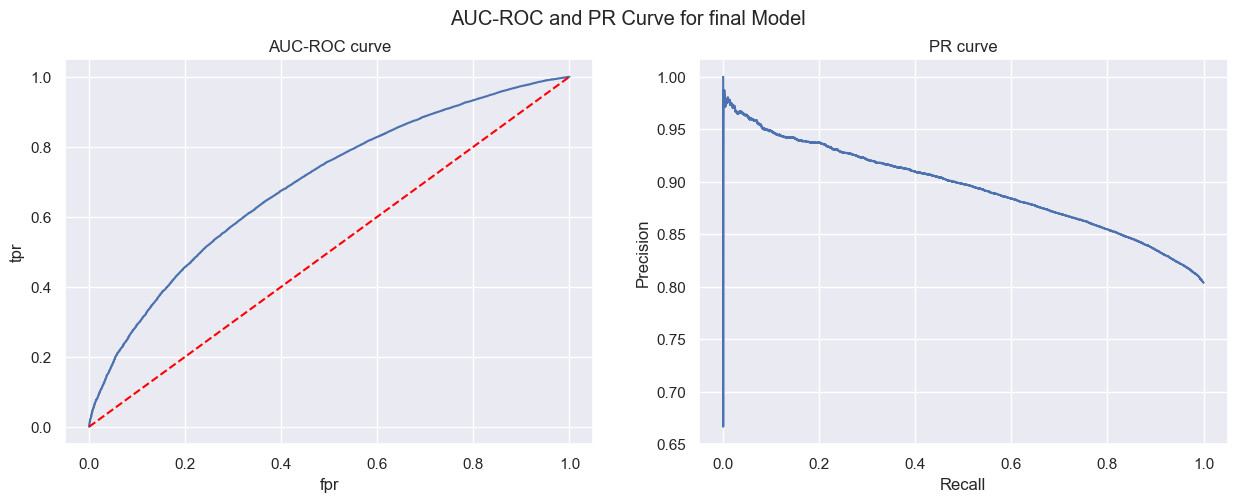

In [69]:
y_prob_baseline = logreg_final.predict_proba(X_test_processed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_processed, y_prob_baseline)
precision, recall, thr = precision_recall_curve(y_test_processed, y_prob_baseline)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUC-ROC curve')
plt.grid()


plt.subplot(1,2,2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.grid()

plt.suptitle("AUC-ROC and PR Curve for final Model")


plt.show()

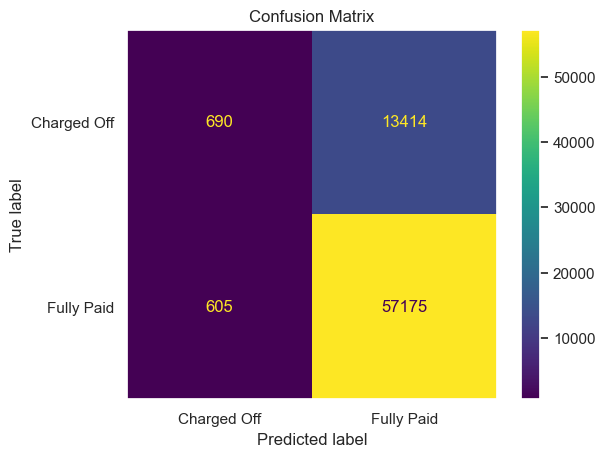

In [72]:
cm = confusion_matrix(y_test_processed, y_test_pred_baseline)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Charged Off', 'Fully Paid'])

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [81]:
pd.DataFrame(logreg_final.coef_.T, index = X_train.columns,columns= ['coefficients']).sort_values('coefficients')

,coefficients
dti,-0.717742
loan_amnt,-0.587781
int_rate,-0.526069
pub_rec,-0.209416
grade,-0.203861
pub_rec_bankruptcies,-0.110883
revol_util,-0.068582
initial_list_status,-0.024010
term,-0.012878
issue_d,-0.011838


# Recommendations
1. Offer loan amounts within the prevalent range of 8000 - 10000 to align with applicant preferences.
2. Formulate competitive interest rate strategies around the common rate of 10% with a narrow deviation to attract borrowers.
3. Tailor income verification processes and loan limits based on the observed income range (45,000 - 90,000) and debt-to-income ratios.
4. Emphasize responsible credit utilization, given the prevalent Revolving Utilization rate of 36-73, to enhance borrower financial management.
5. Introduce diverse loan products to cater to varying credit profiles, considering different income brackets and creditworthiness levels.

# Questionnaire
1. What percentage of customers have fully paid their Loan Amount? --> **80.38%**
2. Comment about the correlation between Loan Amount and Installment features. **Very high correlation between them.**
3. The majority of people have home ownership as **MORTGATGE**.
4. People with grades ‘A’ are more likely to fully pay their loan. **True**
5. Name the top 2 afforded job titles. **Teacher and Manager**
6. Thinking from a bank's perspective, which metric should our primary focus be on..**Recall**, if Charged off is considered as 0 and Fully Paid is considered as 1.
7. How does the gap in precision and recall affect the bank?
**High Recall, Low Precision** - A focus on high recall might result in capturing a larger portion of actual fully paid loans, reducing the chance of missing out on good borrowers.
**High Precision, Low Recall** - The bank may have a more conservative approach, ensuring that loans predicted as fully paid are highly likely to be repaid. This minimizes the risk of approving loans that might later result in defaults.
8. Which were the features that heavily affected the outcome? **Installment and Subgrade**

9. Will the results be affected by geographical location? **No**


